## 使用 TensorFlow 進行深度學習-2

### 一、TensorFlow 下載 MNIST 辨識資料集
- 資料集由 Yann LeCun (Convolutional Neural Networks 創始人) 所收集

In [10]:
import tensorflow as tf
# 讀取 MNIST 資料集模組
import tensorflow.examples.tutorials.mnist.input_data as input_data

# 下載並讀取 MNIST 資料
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

# 批次讀取 MNIST 資料
batch_images_xs, batch_labels_ts = mnist.train.next_batch(batch_size = 100)
print('-----------------------------------')

# 查看 mnist 資料筆數
print('train data = ', mnist.train.num_examples)
print('validation data = ', mnist.validation.num_examples)
print('test data = ', mnist.test.num_examples)
print('-----------------------------------')

# 查看批次 mnist 資料筆數
print('batch_images_xs = ', len(batch_images_xs))
print('batch_labels_ts = ', len(batch_labels_ts))
print('-----------------------------------')

# 查看訓練資料
print('x_train_image:', mnist.train.images.shape)
print('t_train_label:', mnist.train.labels.shape)
print('-----------------------------------')

# 查看驗證資料
print('x_validation_image:', mnist.validation.images.shape)
print('t_validation_label:', mnist.validation.labels.shape)
print('-----------------------------------')

# 查看測試資料
print('x_test_image:',  mnist.test.images.shape)
print('t_test_label:',  mnist.test.labels.shape)
print('-----------------------------------')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
-----------------------------------
train data =  55000
validation data =  5000
test data =  10000
-----------------------------------
batch_images_xs =  100
batch_labels_ts =  100
-----------------------------------
x_train_image: (55000, 784)
t_train_label: (55000, 10)
-----------------------------------
x_validation_image: (5000, 784)
t_validation_label: (5000, 10)
-----------------------------------
x_test_image: (10000, 784)
t_test_label: (10000, 10)
-----------------------------------


顯示訓練資料前五個影像:


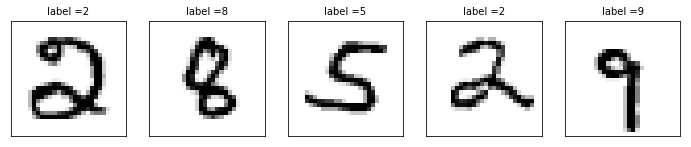

---------------------------------------------------------------------------------------------
顯示驗證資料前五個影像:


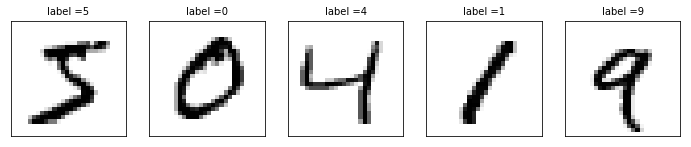

---------------------------------------------------------------------------------------------
顯示測試資料前五個影像:


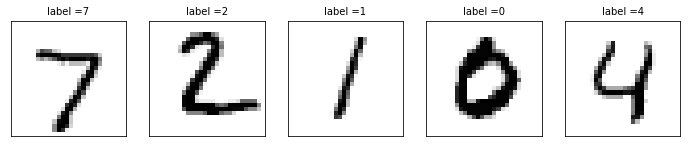

---------------------------------------------------------------------------------------------
顯示批次資料前五個影像:


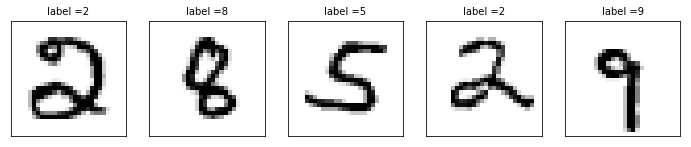

---------------------------------------------------------------------------------------------


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 定義顯示資料的函數
def plot_image_label_prediction(images, labels, prediction, idx, num = 5):
    # 設定圖形的大小
    fig = plt.gcf()
    fig.set_size_inches(12, 15)
    
    if num > 10: num = 10
    
    for i in range(0, num):
        # 建立子圖為 2 行 5 列
        ax = plt.subplot(2, 5, 1+i)
        
        # 畫出子圖形; 使用 np.reshape 將 784 個數字轉換為二維 28*28 的影像
        ax.imshow(np.reshape(images[idx], (28, 28)), cmap = 'binary')
        
        # 子圖 title 名稱; 因為 TensorFlow 的 MNIST 資料集，label 已經是 one-hot-encoding，必須轉換回數字
        title = 'label =' + str(np.argmax(labels[idx]))
        
        # 若有預測資料，則顯示預測結果
        if len(prediction) > 0:
            title += ',predict =' + str(prediction[idx])
        
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        
        idx += 1
        
    plt.show()
    
# 顯示訓練資料前五個影像
print('顯示訓練資料前五個影像:')
plot_image_label_prediction(mnist.train.images,  mnist.train.labels, [], 0, 5)
print('---------------------------------------------------------------------------------------------')

# 顯示驗證資料前五個影像
print('顯示驗證資料前五個影像:')
plot_image_label_prediction(mnist.validation.images,  mnist.validation.labels, [], 0, 5)
print('---------------------------------------------------------------------------------------------')

# 顯示測試資料前五個影像
print('顯示測試資料前五個影像:')
plot_image_label_prediction(mnist.test.images, mnist.test.labels, [], 0, 5)
print('---------------------------------------------------------------------------------------------')

# 顯示批次資料前五個影像
print('顯示批次資料前五個影像:')
plot_image_label_prediction(batch_images_xs, batch_labels_ts, [], 0, 5)
print('---------------------------------------------------------------------------------------------')

### 二、TensorFlow 執行多層感知器 (MLP)

#### 1. 建立多層感知器 (MLP) 的神經網路模型

In [13]:
# 定義 layer 函數
# inputs: 輸入二維陣列的 placeholder, input_dim: 輸入神經元的數量
# output_dim: 輸出神經元的數量, activation: 活化函數 (預設為 None)
def layer(inputs, input_dim, output_dim, activation = None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    
    XW = tf.matmul(inputs, W)
    Sum = tf.add(XW, b)

    if activation is None:
        outputs = Sum
    
    else:
        outputs = activation(Sum)
        
    return outputs

# 建立輸入層
X = tf.placeholder('float', [None, 784])

# 建立隱藏層
h = layer(inputs = X, input_dim = 784, output_dim = 256, activation = tf.nn.relu)

# 建立輸出層
y = layer(inputs = h, input_dim = 256, output_dim = 10, activation = None)

#### 2. 定義神經網路的訓練與評估方式

In [14]:
# 建立訓練資料 label 真實值的 placeholder
t_label = tf.placeholder("float", [None, 10])

# 定義 loss function (計算平均的 cross entropy error)
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = y, labels = t_label))

# 定義最佳化的方法 (呼叫 tf.train 模組來定義 optimizer)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss_function)

# 定義評估模型準確率的方式
# (1) 計算每一筆資料是否預測正確 (tf.equal 用來判斷真實值與預測值是否相等)
correct_prediction = tf.equal(tf.argmax(t_label, 1), tf.argmax(y, 1))

# (2) 計算準確率 (使用 tf.cast 將數值轉化成浮點數，再使用 tf.reduce_mean 將所有數值平均)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

#### 3. 進行神經網路的訓練

In [6]:
# 匯入時間模組
from time import time 

# 定義訓練的超參數
# 訓練週期
train_epochs = 15
# 批次大小
batch_size = 100
# 一個訓練週期批次的數目
total_batch_per_epoch = int(mnist.train.num_examples/batch_size)

# 初始化誤差 list
loss_list = []
# 初始化訓練週期 list
epoch_list = []
# 初始化準確率 list
accuracy_list = []

# 開始計算時間
startTime = time()

# 開始訓練
with tf.Session() as sess:
    # 初始化所有 tensorflow global 變數
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # 執行 15 次的訓練週期
    for epoch in range(train_epochs):
        # 使用批次的訓練資料進行訓練
        for i in range(total_batch_per_epoch):
            batch_x, batch_t = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict = {X: batch_x, t_label: batch_t})
        
        # 使用驗證資料計算 loss 和 accuracy
        loss, acc = sess.run([loss_function, accuracy], feed_dict = {X: mnist.validation.images, t_label: mnist.validation.labels})
        
        # 使用測試資料計算 accuracy
        test_acc = sess.run(accuracy, feed_dict = {X: mnist.test.images, t_label: mnist.test.labels})

        # 使用測試資料執行預測
        prediction_result = sess.run(tf.argmax(y, 1), feed_dict = {X: mnist.test.images})
        
        # 將結果存入 list 並顯示
        epoch_list.append(epoch)
        loss_list.append(loss)
        accuracy_list.append(acc)
        # "%02d" % 數值: 是將數字按寬度為 2，採用右邊對齊方式輸出，若數字位數不到兩位，則左邊補零
        # 格式化數字: "{:.2f}".format(數字) -> 保留小數點後兩位
        print("Train_epoch:", "%02d" % (epoch + 1), ", Loss = ", "{:.2f}".format(loss), ", Accuracy = ", acc)

    # 計算並顯示全部訓練所花的時間
    duration = time() - startTime
    print("Total time for training:", duration)

Train_epoch: 01 , Loss =  6.63 , Accuracy =  0.842
Train_epoch: 02 , Loss =  4.20 , Accuracy =  0.8868
Train_epoch: 03 , Loss =  3.25 , Accuracy =  0.907
Train_epoch: 04 , Loss =  2.68 , Accuracy =  0.9176
Train_epoch: 05 , Loss =  2.35 , Accuracy =  0.9244
Train_epoch: 06 , Loss =  2.16 , Accuracy =  0.9288
Train_epoch: 07 , Loss =  1.99 , Accuracy =  0.9306
Train_epoch: 08 , Loss =  1.85 , Accuracy =  0.9346
Train_epoch: 09 , Loss =  1.76 , Accuracy =  0.9372
Train_epoch: 10 , Loss =  1.62 , Accuracy =  0.9396
Train_epoch: 11 , Loss =  1.51 , Accuracy =  0.9426
Train_epoch: 12 , Loss =  1.52 , Accuracy =  0.941
Train_epoch: 13 , Loss =  1.43 , Accuracy =  0.9444
Train_epoch: 14 , Loss =  1.40 , Accuracy =  0.9472
Train_epoch: 15 , Loss =  1.39 , Accuracy =  0.9456
Total time for training: 30.679754972457886


#### 4. 圖形顯示驗證過程

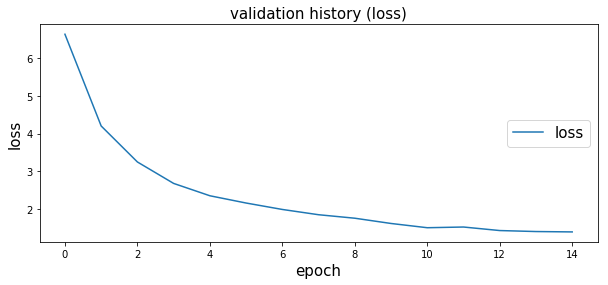

---------------------------------------------------------------------------------------------


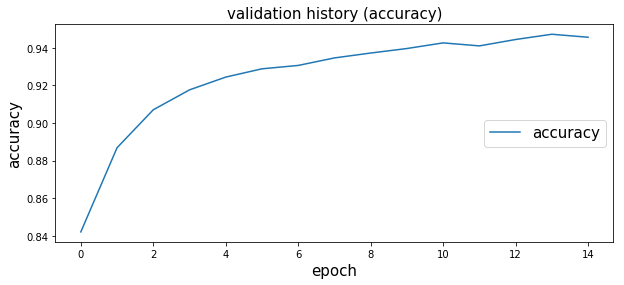

In [7]:
import matplotlib.pyplot as plt

def show_validation_history(x_values, y_values, x_label, y_label):
    fig = plt.gcf()
    fig.set_size_inches(10, 4)
    plt.plot(x_values, y_values, label = y_label)
    plt.title('validation history ' + '(' + y_label + ')', fontsize = 15)
    plt.xlabel(x_label, fontsize = 15)
    plt.ylabel(y_label, fontsize = 15)
    plt.legend(loc = 'center right', fontsize = 15)
    plt.show()
    
# loss function 的變化    
show_validation_history(epoch_list, loss_list, 'epoch', 'loss')
print('---------------------------------------------------------------------------------------------')

# accuracy 的變化
show_validation_history(epoch_list, accuracy_list, 'epoch', 'accuracy')

#### 5. 用測試資料評估模型準確率

In [8]:
print("Accuracy:", test_acc)

Accuracy: 0.9461


#### 6. 顯示預測結果

顯示預測結果的前五個影像:


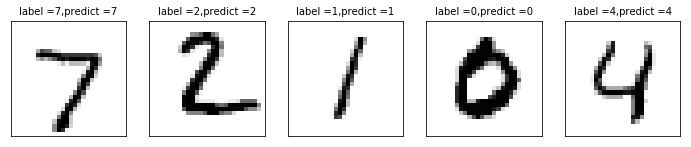

---------------------------------------------------------------------------------------------


In [9]:
# 顯示預測結果的前五個影像
print('顯示預測結果的前五個影像:')
plot_image_label_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0, 5)
print('---------------------------------------------------------------------------------------------')

### 三、TensorFlow 執行執行卷積神經網路 (CNN)

#### 1. 建立卷積神經網路(CNN)模型

建立函數

In [15]:
# 定義權重函數: weight
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev = 0.1), name = 'W')

# 定義偏權值函數: bias
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape = shape), name = 'b')

# 定義卷積函數: conv2d
def conv2d(X, W):
    # 濾鏡權重: W, 步伐格式: [1, stride, stride, 1], 填補模式 'SAME': 邊界外埔零再運算
    return tf.nn.conv2d(X, W, strides = [1, 1, 1, 1], padding = 'SAME')

# 定義池化函數: max_pool_2×2
def max_pool_2_2(X):
    # 取樣窗口格式: [1, height, width, 1], 步伐格式: [1, stride, stride, 1], 填補模式 'SAME': 邊界外補零再運算
    return tf.nn.max_pool(X, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

建立模型

In [16]:
# 建立輸入層
with tf.name_scope('Input_Layer'):
    X = tf.placeholder('float', shape = [None, 784], name = 'X')
    # 4 維張量格式: [不固定的筆數, 2 維數字影像大小, 色版數]
    X_image = tf.reshape(X, [-1, 28, 28, 1])

# 建立卷積層
with tf.name_scope('Conv'):
    # 濾鏡權重格式: [2 維濾鏡大小, 色版數, 濾鏡數]
    W1 = weight([5, 5, 1, 16])
    b1 = bias([16])
    Conv  = conv2d(X_image, W1) + b1
    Conv_out = tf.nn.relu(Conv)

# 建立池化層
with tf.name_scope('Pool'):
    Pool = max_pool_2_2(Conv_out)

# 建立平坦層
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(Pool, [-1, 3136])

# 建立 Dropout 層
with tf.name_scope('Dropout'):
    D_Flat_Dropout = tf.nn.dropout(D_Flat, rate = 0.5)

# 建立隱藏層
with tf.name_scope('D_Hidden_Layer'):
    W2 = weight([3136, 100])
    b2 = bias([100])
    D_Hidden = tf.nn.relu(tf.add(tf.matmul(D_Flat_Dropout, W2), b2))

# 建立輸出層
with tf.name_scope('Output_Layer'):
    W3 = weight([100, 10])
    b3 = bias([10])
    y = tf.nn.softmax(tf.add(tf.matmul(D_Hidden, W3), b3))

#### 2. 定義神經網路的訓練與評估方式

In [4]:
# 定義神經網路的訓練方式
with tf.name_scope("optimizer"):
    # 建立訓練資料 label 真實值的 placeholder
    t_label = tf.placeholder("float", [None, 10])

    # 定義 loss function (計算平均的 cross entropy error)
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = y, labels = t_label))

    # 定義最佳化的方法 (呼叫 tf.train 模組來定義 optimizer)
    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss_function)

# 定義評估模型準確率的方式
with tf.name_scope("evaluate_model"):
    # (1) 計算每一筆資料是否預測正確 (tf.equal 用來判斷真實值與預測值是否相等)
    correct_prediction = tf.equal(tf.argmax(t_label, 1), tf.argmax(y, 1))

    # (2) 計算準確率 (使用 tf.cast 將數值轉化成浮點數，再使用 tf.reduce_mean 將所有數值平均)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

#### 3. 進行神經網路的訓練

In [5]:
# 匯入時間模組
from time import time 

# 定義訓練的超參數
# 訓練週期
train_epochs = 20
# 批次大小
batch_size = 100
# 一個訓練週期批次的數目
total_batch_per_epoch = int(mnist.train.num_examples/batch_size)

# 初始化誤差 list
loss_list = []
# 初始化訓練週期 list
epoch_list = []
# 初始化準確率 list
accuracy_list = []

# 開始計算時間
startTime = time()

# 開始訓練
with tf.Session() as sess:
    # 初始化所有 tensorflow global 變數
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # 執行 15 次的訓練週期
    for epoch in range(train_epochs):
        # 使用批次的訓練資料進行訓練
        for i in range(total_batch_per_epoch):
            batch_x, batch_t = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict = {X: batch_x, t_label: batch_t})
        
        # 使用驗證資料計算 loss 和 accuracy
        loss, acc = sess.run([loss_function, accuracy], feed_dict = {X: mnist.validation.images, t_label: mnist.validation.labels})
        
        # 使用測試資料計算 accuracy
        test_acc = sess.run(accuracy, feed_dict = {X: mnist.test.images, t_label: mnist.test.labels})

        # 使用測試資料執行預測
        prediction_result = sess.run(tf.argmax(y, 1), feed_dict = {X: mnist.test.images})
        
        # 將結果存入 list 並顯示
        epoch_list.append(epoch)
        loss_list.append(loss)
        accuracy_list.append(acc)
        # "%02d" % 數值: 是將數字按寬度為 2，採用右邊對齊方式輸出，若數字位數不到兩位，則左邊補零
        # 格式化數字: "{:.2f}".format(數字) -> 保留小數點後兩位
        print("Train_epoch:", "%02d" % (epoch + 1), ", Loss = ", "{:.2f}".format(loss), ", Accuracy = ", acc)

    # 計算並顯示全部訓練所花的時間
    duration = time() - startTime
    print("Total time for training:", duration)

Train_epoch: 01 , Loss =  1.63 , Accuracy =  0.839
Train_epoch: 02 , Loss =  1.61 , Accuracy =  0.8522
Train_epoch: 03 , Loss =  1.50 , Accuracy =  0.9644
Train_epoch: 04 , Loss =  1.49 , Accuracy =  0.9682
Train_epoch: 05 , Loss =  1.49 , Accuracy =  0.9724
Train_epoch: 06 , Loss =  1.49 , Accuracy =  0.9748
Train_epoch: 07 , Loss =  1.49 , Accuracy =  0.9746
Train_epoch: 08 , Loss =  1.49 , Accuracy =  0.9772
Train_epoch: 09 , Loss =  1.49 , Accuracy =  0.9748
Train_epoch: 10 , Loss =  1.48 , Accuracy =  0.9812
Train_epoch: 11 , Loss =  1.48 , Accuracy =  0.9774
Train_epoch: 12 , Loss =  1.48 , Accuracy =  0.979
Train_epoch: 13 , Loss =  1.48 , Accuracy =  0.9804
Train_epoch: 14 , Loss =  1.48 , Accuracy =  0.9806
Train_epoch: 15 , Loss =  1.48 , Accuracy =  0.9822
Train_epoch: 16 , Loss =  1.48 , Accuracy =  0.9812
Train_epoch: 17 , Loss =  1.48 , Accuracy =  0.9826
Train_epoch: 18 , Loss =  1.48 , Accuracy =  0.982
Train_epoch: 19 , Loss =  1.48 , Accuracy =  0.9844
Train_epoch: 20

#### 4. 圖形顯示訓練過程

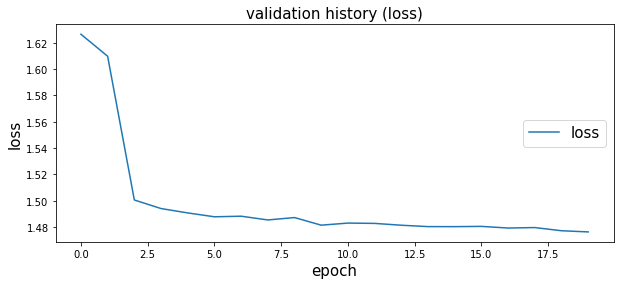

---------------------------------------------------------------------------------------------


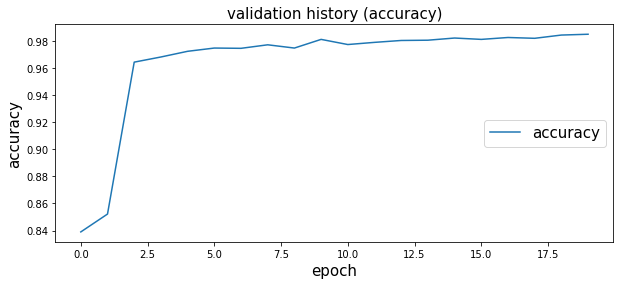

In [7]:
import matplotlib.pyplot as plt

def show_validation_history(x_values, y_values, x_label, y_label):
    fig = plt.gcf()
    fig.set_size_inches(10, 4)
    plt.plot(x_values, y_values, label = y_label)
    plt.title('validation history ' + '(' + y_label + ')', fontsize = 15)
    plt.xlabel(x_label, fontsize = 15)
    plt.ylabel(y_label, fontsize = 15)
    plt.legend(loc = 'center right', fontsize = 15)
    plt.show()
    
# loss function 的變化    
show_validation_history(epoch_list, loss_list, 'epoch', 'loss')
print('---------------------------------------------------------------------------------------------')

# accuracy 的變化
show_validation_history(epoch_list, accuracy_list, 'epoch', 'accuracy')

#### 5. 用測試資料評估模型準確率

In [8]:
print("Accuracy:", test_acc)

Accuracy: 0.9839


#### 6. 顯示預測結果

顯示預測結果的前五個影像:


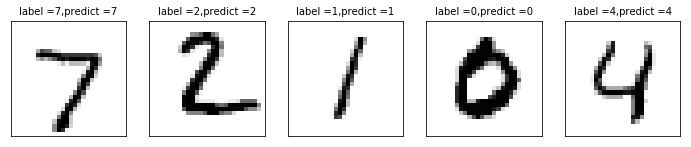

---------------------------------------------------------------------------------------------


In [12]:
# 顯示預測結果的前五個影像
print('顯示預測結果的前五個影像:')
plot_image_label_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0, 5)
print('---------------------------------------------------------------------------------------------')